# Inteligencia Artificial / Maestría MACC
## Miniproyecto 1: Problema del Caballo en Tablero nxm
#### Presentado por: Juan David Rojas \& Oscar Velasco
#### Presentado a: Edgar José Andrade
### 19 de Septiembre de 2021

In [ ]:
import numpy as np
import random as rd
import time as tm
import copy as cp

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
from IPython.display import clear_output

## Implementación Ambiente de Tarea

In [ ]:
class nsquare_horses:

    def __init__(self, n = 8, m = 8, pos = None):
        self.n = n
        self.m = m
        if(pos == None):
            fil = rd.randint(1, self.n)
            col = rd.randint(1, self.m)
            pos = (fil, col)
        self.estado_inicial = np.matrix([[0] * self.m] * self.n)
        self.estado_inicial[pos[0] - 1, pos[1] - 1] = 1
        self.pos_inicial = pos
    

    def pintar_estado(self, estado):
        fig, axes = plt.subplots()
        fig.set_size_inches(self.m, self.n)
        step = 1. / self.n
        offset = 0.001
        tangulos = []


        a = 0.998 if(self.n == self.m) else min([self.n, self.m]) / max([self.n, self.m]) - 0.002 

        tangulos.append(patches.Rectangle((0, 0), a, 0.998, \
        facecolor = 'cornsilk', edgecolor = 'black', linewidth = 2))

        u = self.n // 2 if self.n % 2 == 0 else self.n // 2 + 1 # Filas par o impar
        v = self.m // 2 if self.m % 2 == 0 else self.m // 2 + 1 # Columnas par o impar
        for i in range(u):
            for j in range(v):
                tangulos.append(patches.Rectangle((2 * i * step, 2 * j * step), \
                                                  step - offset, step, \
                                                  facecolor = 'lightslategrey', \
                                                  ec = 'k', lw = 3))
                tangulos.append(patches.Rectangle((step + 2 * i * step, (2 * j + 1) * step), \
                                                  step - offset, step, \
                                                  facecolor = 'lightslategrey', \
                                                  ec = 'k', lw = 3))
        
        for t in tangulos: 
            axes.add_patch(t)

        arr_img = plt.imread('caballo.png', format = 'png')
        zooms = []
        imagebox = OffsetImage(arr_img, zoom = 0.1)
        imagebox.image.axes = axes
        offsetX = 0.065
        offsetY = 0.065
        for i in range(1, self.m + 1):
            for j in range(1, self.n + 1):
                if(estado[j - 1, i - 1] >= 1):
                    Y = self.n - j
                    X = i - 1
                    # print(X, Y)
                    # ab = AnnotationBbox(imagebox, [X * step + offsetX, Y * step + offsetY], \
                    #                    frameon = False)
                    # axes.add_artist(ab)
                    axes.text(X * step + step / 2, Y * step + step / 2, estado[j - 1, i - 1], \
                              ha = "center", va = "center", size = 30, c = 'k')

        axes.set_xlim(0, a + 0.002)
        axes.set_ylim(0, 1)
        axes.axis('off')
        # axes.set_zorder(1)
        fig.savefig("tablero" + str(self.n) + "x" + str(self.m) + ".png")
        return axes

    
    def valida(self, posicion, estado):
        if (posicion[0] > -1) & (posicion[0] < self.n) & (posicion[1] > -1) & (posicion[1] < self.m):
            if(estado[posicion[0], posicion[1]] == 0):
                return True
        return False


    def acciones_aplicables(self, estado):
        # Devuelve una lista con las posiciones en las cuales se puede mover
        # Input: estado, que es una np.matrix(nxn)
        # Output: lista de parejas (x1,y1) donde puede hacer el siguiente movimiento el caballo
        
        # posición del último caballo
        i,j = np.unravel_index(np.argmax(estado, axis=None), estado.shape)
    
        # recorrer todas las direcciones posibles y ver si no se han recorrido
        direcciones = np.array([[2, 1], [2, -1], [-2, 1], [-2, -1], [1, 2], [-1, 2], [1, -2], [-1, -2]])
        acciones = [(posicion[0], posicion[1]) for posicion in direcciones + [i, j] if self.valida(posicion, estado)]             
        return acciones


    def transicion(self, estado, indice):
        # Devuelve el tablero colocando el caballo en la posición dada por indice
        # Input: estado, que es una np.matrix(nxn)
        #        indice, de la forma (x1,y1)
        # Output: estado, que es una np.matrix(nxn)
        s = cp.deepcopy(estado)
        s[indice[0], indice[1]] = np.max(estado) + 1
        return s


    def test_objetivo(self, estado):
        # Devuelve True/False dependiendo si el estado
        # resuelve el problema
        # Input: estado, que es una np.matrix(nxn)
        # Output: True/False
        # Decide si las entradas en la matriz son n*m números diferentes de 0.
        ##return len(set(np.array(np.unique(estado))).difference({0}))==(self.n * self.m)
        return len(set(np.array(np.unique((np.array(estado)).reshape(-1)))).difference({0})) == (self.n * self.m)


    def costo(self, estado, accion):
        s = cp.deepcopy(estado)
        s[accion[0], accion[1]] = np.max(estado) + 1
        return len(self.acciones_aplicables(s))


    def codigo(self, estado):
        return str(estado)


    def camino(self, node):
        camino = []
        nodo = cp.deepcopy(node)
        while(nodo.madre != None):
            camino = [nodo.estado] + camino
            nodo = nodo.madre
        else:
            camino = [nodo.estado] + camino
        return camino


    def animacion(self, node):
        pasos = self.camino(node)
        # print(pasos)
        clear_output(wait = True)
        for p in pasos:
            self.pintar_estado(p)
            plt.show()
            tm.sleep(2)
            clear_output(wait = True)


## Definición del Problema

## Solución del Problema

In [ ]:
from algorithms import Nodo, breadth_first_search, depth_first_search, best_first_search, backtracking_search

### Tablero 4x3

In [ ]:
n43 = nsquare_horses(4, 3, (1, 2))
s43 = n43.estado_inicial
print(s43)
print(n43.pos_inicial)

[[0 1 0]
 [0 0 0]
 [0 0 0]
 [0 0 0]]
(1, 2)


<AxesSubplot:>

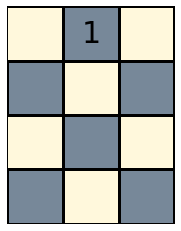

In [ ]:
n43.pintar_estado(s43)

In [ ]:
# depth_first_search
begin1 = tm.time()
l1 = depth_first_search(n43)
print("Time Depth: ", tm.time() - begin1)

Time Depth:  0.015457391738891602


In [ ]:
l1.estado

matrix([[10,  1,  8],
        [ 7,  4, 11],
        [ 2,  9,  6],
        [ 5, 12,  3]])

<AxesSubplot:>

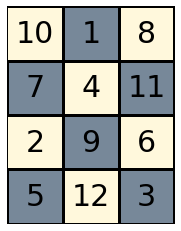

In [ ]:
n43.pintar_estado(l1.estado)

In [ ]:
# breadth_first_search
begin2 = tm.time()
l2 = breadth_first_search(n43)
print("Time Breadth: ", tm.time() - begin2)

Time Breadth:  0.03502345085144043


In [ ]:
l2.estado

matrix([[12,  1, 10],
        [ 9,  4,  7],
        [ 6, 11,  2],
        [ 3,  8,  5]])

<AxesSubplot:>

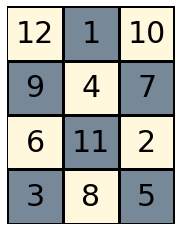

In [ ]:
n43.pintar_estado(l2.estado)

In [ ]:
# best_first_search
begin3 = tm.time()
l3 = best_first_search(n43)
print("Time bfs:", tm.time() - begin3)

Time bfs: 0.06365680694580078


In [ ]:
l3.estado

matrix([[12,  1, 10],
        [ 9,  4,  7],
        [ 6, 11,  2],
        [ 3,  8,  5]])

<AxesSubplot:>

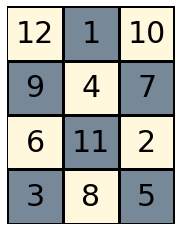

In [ ]:
n43.pintar_estado(l3.estado)

In [ ]:
# backtracking_search
nodo1 = Nodo(n43.estado_inicial, None, None, 0, n43.codigo(n43.estado_inicial))
begin4 = tm.time()
l4 = backtracking_search(n43, nodo1)
print("Time backtr:", tm.time() - begin4)

Time backtr: 0.006739377975463867


In [ ]:
l4.estado

matrix([[12,  1, 10],
        [ 9,  4,  7],
        [ 6, 11,  2],
        [ 3,  8,  5]])

<AxesSubplot:>

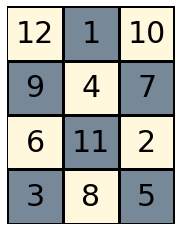

In [ ]:
n43.pintar_estado(l4.estado)

### Tablero 4x4

In [ ]:
n4 = nsquare_horses(4, 4, (3, 3))
s4 = n4.estado_inicial
print(s4)
print(n4.pos_inicial)

[[0 0 0 0]
 [0 0 0 0]
 [0 0 1 0]
 [0 0 0 0]]
(3, 3)


<AxesSubplot:>

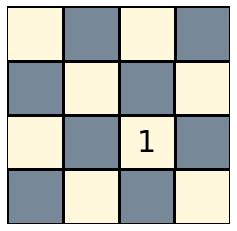

In [ ]:
n4.pintar_estado(s4)

In [ ]:
# depth_first_search
begin5 = tm.time()
l5 = depth_first_search(n4)
print("Time Depth: ", tm.time() - begin5)

Time Depth:  0.44444942474365234


In [ ]:
l5

'Falla'

In [ ]:
# breadth_first_search
begin6 = tm.time()
l6 = breadth_first_search(n4)
print("Time Breadth: ", tm.time() - begin6)

Time Breadth:  0.4580802917480469


In [ ]:
l6

'Falla'

In [ ]:
# best_first_search
begin7 = tm.time()
l7 = best_first_search(n4)
print("Time bfs:", tm.time() - begin7)

Time bfs: 0.5216841697692871


In [ ]:
l7

'Falla'

In [ ]:
# backtracking_search
nodo2 = Nodo(n4.estado_inicial, None, None, 0, n4.codigo(n4.estado_inicial))
begin8 = tm.time()
l8 = backtracking_search(n4, nodo2)
print("Time backtr:", tm.time() - begin8)

Time backtr: 0.5014712810516357


In [ ]:
l8

'Falla'

### Tablero 5x5

In [ ]:
n5 = nsquare_horses(5, 5, (3, 3))
s5 = n5.estado_inicial
print(s5)
print(n5.pos_inicial)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
(3, 3)


<AxesSubplot:>

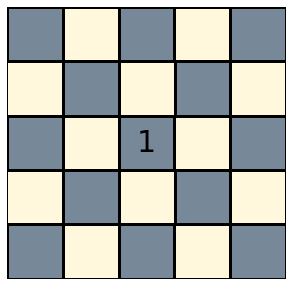

In [ ]:
n5.pintar_estado(s5)

In [ ]:
# depth_first_search
begin9 = tm.time()
l9 = depth_first_search(n5)
print("Time Depth: ", tm.time() - begin9)

Time Depth:  4.876282453536987


In [ ]:
l9.estado

matrix([[21,  8,  3, 14, 19],
        [ 2, 13, 20,  9,  4],
        [ 7, 22,  1, 18, 15],
        [12, 17, 24,  5, 10],
        [23,  6, 11, 16, 25]])

<AxesSubplot:>

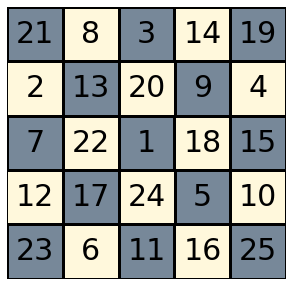

In [ ]:
n5.pintar_estado(l9.estado)

In [ ]:
## breadth_first_search
#begin10 = tm.time()
#l10 = breadth_first_search(n5)
#print("Time Breadth: ", tm.time() - begin10)
# Mas de 20min y no termina

In [ ]:
# best_first_search
begin11 = tm.time()
l11 = best_first_search(n5)
print("Time bfs:", tm.time() - begin11)

Time bfs: 262.13512539863586


In [ ]:
l11.estado

matrix([[25, 12, 17,  6, 23],
        [ 2,  7, 24, 11, 16],
        [13, 18,  1, 22,  5],
        [ 8,  3, 20, 15, 10],
        [19, 14,  9,  4, 21]])

<AxesSubplot:>

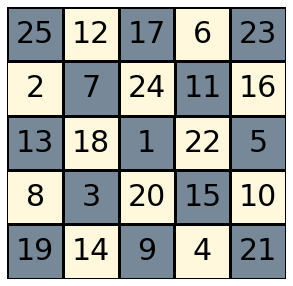

In [ ]:
n5.pintar_estado(l11.estado)

In [ ]:
# backtracking_search
nodo3 = Nodo(n5.estado_inicial, None, None, 0, n5.codigo(n5.estado_inicial))
begin12 = tm.time()
l12 = backtracking_search(n5, nodo3)
print("Time backtr:", tm.time() - begin12)

Time backtr: 0.021367788314819336


In [ ]:
l12.estado

matrix([[25, 10, 15,  4, 19],
        [16,  5, 18,  9, 14],
        [11, 24,  1, 20,  3],
        [ 6, 17, 22, 13,  8],
        [23, 12,  7,  2, 21]])

<AxesSubplot:>

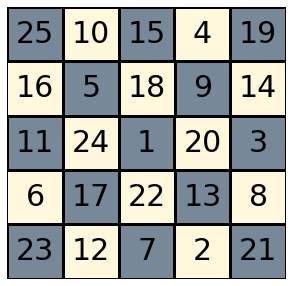

In [ ]:
n5.pintar_estado(l12.estado)

### Tablero 6x6

In [ ]:
n6 = nsquare_horses(6, 6, (4, 4))
s6 = n6.estado_inicial
print(s6)
print(n6.pos_inicial)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
(4, 4)


<AxesSubplot:>

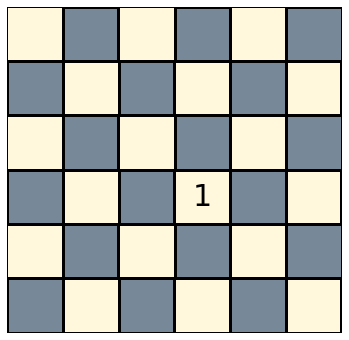

In [ ]:
n6.pintar_estado(s6)

In [ ]:
## depth_first_search
#begin13 = tm.time()
#l13 = depth_first_search(n6)
#print("Time Depth: ", tm.time() - begin13)

In [ ]:
# backtracking_search
nodo4 = Nodo(n6.estado_inicial, None, None, 0, n6.codigo(n6.estado_inicial))
begin14 = tm.time()
l14 = backtracking_search(n6, nodo4)
print("Time backtr:", tm.time() - begin14)

Time backtr: 0.02905559539794922


In [ ]:
l14.estado

matrix([[11, 30,  5, 24, 13, 36],
        [ 6, 21, 12, 35,  4, 23],
        [29, 10, 31, 22, 25, 14],
        [20,  7, 18,  1, 34,  3],
        [17, 28,  9, 32, 15, 26],
        [ 8, 19, 16, 27,  2, 33]])

<AxesSubplot:>

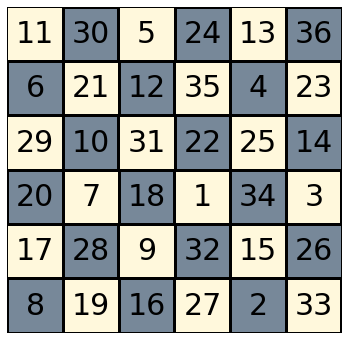

In [ ]:
n6.pintar_estado(l14.estado)

### Tablero 7x7

In [ ]:
n7 = nsquare_horses(7, 7, (4, 4))
s7 = n7.estado_inicial
print(s7)
print(n7.pos_inicial)

[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]
(4, 4)


<AxesSubplot:>

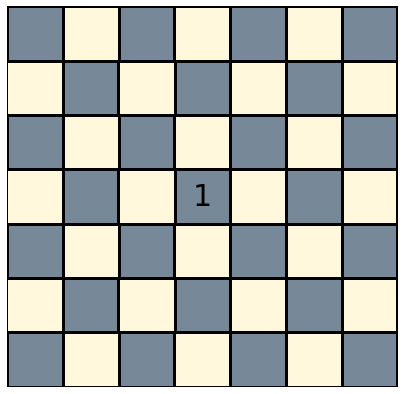

In [ ]:
n7.pintar_estado(s7)

In [ ]:
# backtracking_search
nodo5 = Nodo(n7.estado_inicial, None, None, 0, n7.codigo(n7.estado_inicial))
begin15 = tm.time()
l15 = backtracking_search(n7, nodo5)
print("Time backtr:", tm.time() - begin15)

Time backtr: 0.0581507682800293


<AxesSubplot:>

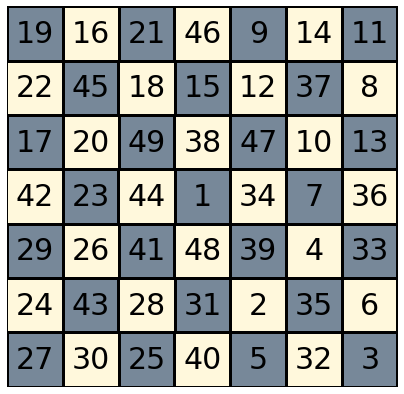

In [ ]:
n7.pintar_estado(l15.estado)

### Tablero 8x8


In [ ]:
n8 = nsquare_horses(8, 8, (5, 4))
s8 = n8.estado_inicial
print(s8)
print(n8.pos_inicial)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
(5, 4)


<AxesSubplot:>

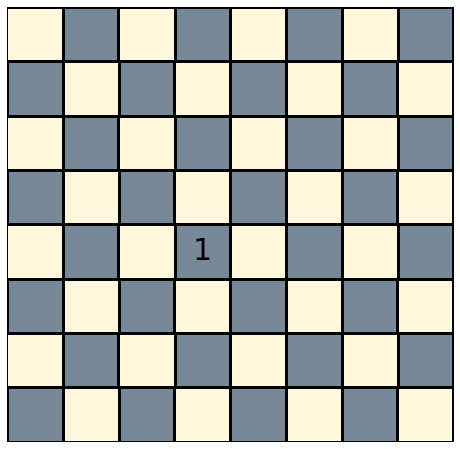

In [ ]:
n8.pintar_estado(s8)

In [ ]:
# backtracking_search
nodo6 = Nodo(n8.estado_inicial, None, None, 0, n8.codigo(n8.estado_inicial))
begin16 = tm.time()
l16 = backtracking_search(n8, nodo6)
print("Time backtr:", tm.time() - begin16)

Time backtr: 0.07306647300720215


In [ ]:
l16.estado

matrix([[40, 61, 14, 49, 42,  7, 12,  9],
        [15, 50, 41, 60, 13, 10, 45,  6],
        [64, 39, 62, 43, 48, 55,  8, 11],
        [51, 16, 59, 54, 57, 44,  5, 46],
        [38, 63, 52,  1, 32, 47, 56, 27],
        [17, 22, 19, 58, 53, 28, 33,  4],
        [20, 37, 24, 31,  2, 35, 26, 29],
        [23, 18, 21, 36, 25, 30,  3, 34]])

<AxesSubplot:>

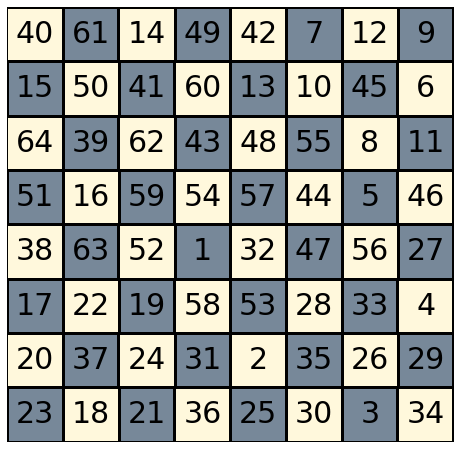

In [ ]:
n8.pintar_estado(l16.estado)

### Tablero 9x9

In [ ]:
n9 = nsquare_horses(9, 9, (5, 5))
s9 = n9.estado_inicial
print(s9)
print(n9.pos_inicial)

[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]
(5, 5)


<AxesSubplot:>

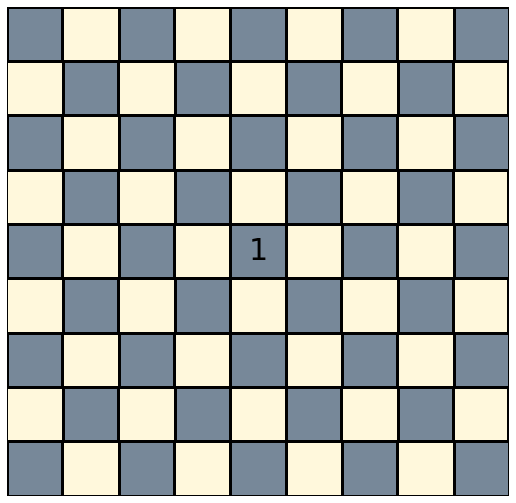

In [ ]:
n9.pintar_estado(s9)

In [ ]:
# backtracking_search
nodo7 = Nodo(n9.estado_inicial, None, None, 0, n9.codigo(n9.estado_inicial))
begin17 = tm.time()
l17 = backtracking_search(n9, nodo7)
print("Time backtr:", tm.time() - begin17)

Time backtr: 0.1341710090637207


In [ ]:
l17.estado

matrix([[43, 10, 51, 80, 23,  8, 21, 72, 25],
        [50, 39, 44,  9, 76, 71, 24,  7, 20],
        [11, 42, 81, 52, 79, 22, 75, 26, 73],
        [38, 49, 40, 45, 68, 77, 70, 19,  6],
        [41, 12, 53, 78,  1, 64, 67, 74, 27],
        [48, 37, 46, 63, 66, 69, 58,  5, 18],
        [13, 34, 61, 54, 59,  2, 65, 28, 57],
        [36, 47, 32, 15, 62, 55, 30, 17,  4],
        [33, 14, 35, 60, 31, 16,  3, 56, 29]])

<AxesSubplot:>

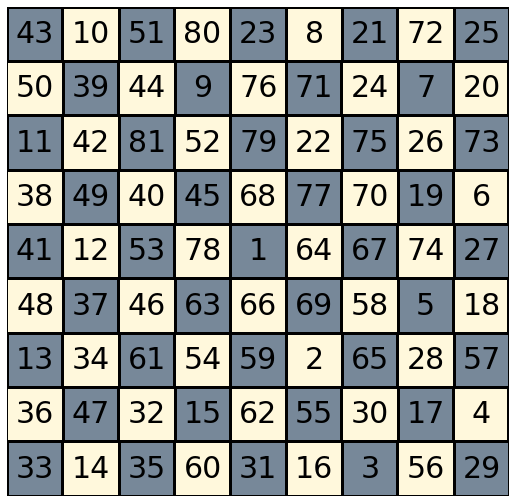

In [ ]:
n9.pintar_estado(l17.estado)

### Tablero 10x10

In [ ]:
n10 = nsquare_horses(10, 10, (6, 5))
s10 = n10.estado_inicial
print(s10)
print(n10.pos_inicial)

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]
(6, 5)


<AxesSubplot:>

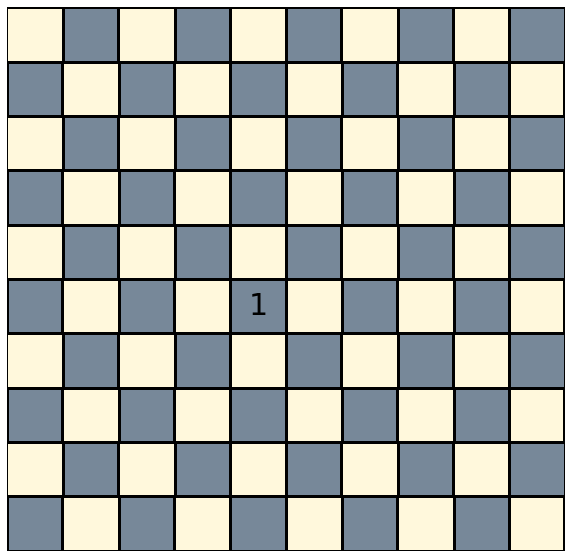

In [ ]:
n10.pintar_estado(s10)

In [ ]:
# backtracking_search
nodo8 = Nodo(n10.estado_inicial, None, None, 0, n10.codigo(n10.estado_inicial))
begin18 = tm.time()
l18 = backtracking_search(n10, nodo8)
print("Time backtr:", tm.time() - begin18)

Time backtr: 0.18976545333862305


In [ ]:
l18.estado

matrix([[ 12,  87,  58,  27,  10,  29,  68,  45,   8,  31],
        [ 57,  26,  11,  86,  77,  46,   9,  30,  73,  44],
        [ 94,  13,  88,  59,  28,  69,  74,  67,  32,   7],
        [ 25,  56,  95,  78,  85,  76,  47,  70,  43,  72],
        [ 14,  93,  24,  89,  60,  79,  66,  75,   6,  33],
        [ 23, 100,  55,  96,   1,  84,  61,  48,  71,  42],
        [ 54,  15,  92,  19,  90,  49,  80,  65,  34,   5],
        [ 99,  22,  97,  52,  83,   2,  37,  62,  41,  64],
        [ 16,  53,  20,  91,  18,  81,  50,  39,   4,  35],
        [ 21,  98,  17,  82,  51,  38,   3,  36,  63,  40]])

<AxesSubplot:>

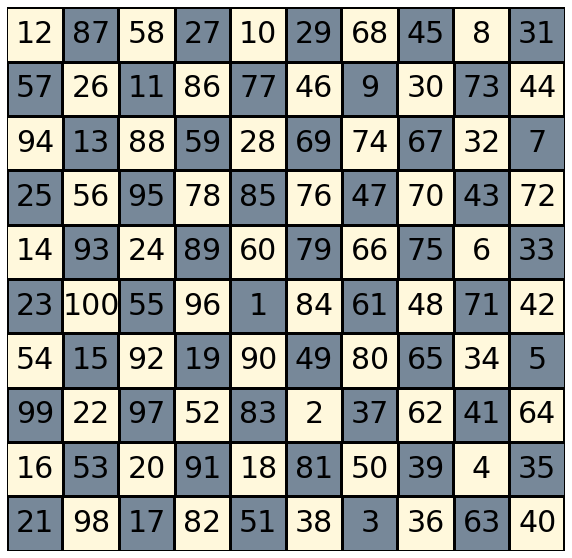

In [ ]:
n10.pintar_estado(l18.estado)

## Animación Tablero 4x3

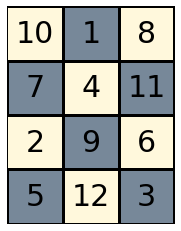

In [ ]:
n43.animacion(l1)
# clear_output()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f21d5dbc-082d-42bd-b57a-f7b8ec44446e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>